In [9]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def getdata(airline):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    operators = airline
    payload = {'max_pages': 5}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"operators/{operators}/flights",
    params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")

def getflight(callsign):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    flight = str(callsign)
    current_utc_time = datetime.datetime.utcnow()
    utc = current_utc_time.strftime("%Y-%m-%dT%H:%M:%SZ")
    one_day_ago = current_utc_time - datetime.timedelta(days=1)
    utc_1 = one_day_ago.strftime("%Y-%m-%dT%H:%M:%SZ")
    payload = {'max_pages': 1,'start':utc_1,'end':utc}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"flights/{flight}",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")
def get_airport_arrivals(airport):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    airports = airport
    payload = {'max_pages': 2}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"airports/{airports}/flights",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        airport_output = response.json()
    else:
       return("Error executing request")

    airport_arrivals = pd.json_normalize(airport_output['arrivals'])
    airport_arrivals_cleaned=airport_arrivals[["ident_icao","operator","departure_delay","arrival_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]]
    return airport_arrivals_cleaned
def get_historical_flight(callsign):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    flight = str(callsign)
    current_utc_time = datetime.datetime.utcnow() - datetime.timedelta(days=1)
    utc = current_utc_time.strftime("%Y-%m-%dT%H:%M:%SZ")
    T_15 = current_utc_time - datetime.timedelta(days=7)
    utc_1 = T_15.strftime("%Y-%m-%dT%H:%M:%SZ")
    payload = {'max_pages': 4,'start':utc_1,'end':utc}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"flights/{flight}",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")

In [10]:
target_flight = input('Input flight callsign. e.g."UAL1"')
flightdata = getflight(target_flight)
flight = pd.json_normalize(flightdata['flights'])
airline = flight['operator_icao'][0]
departure_delay = flight['departure_delay'][0]
aircraft = flight['aircraft_type'][0]
dist = flight['route_distance'][0]
origin = flight['origin.code_icao'][0]
destination = flight['destination.code_icao'][0]
print(origin)
historical_data = get_historical_flight(target_flight)
print(historical_data)


KSFO
{'flights': [{'ident': 'UAL1', 'ident_icao': 'UAL1', 'ident_iata': 'UA1', 'actual_runway_off': '28L', 'actual_runway_on': '02L', 'fa_flight_id': 'UAL1-1699098253-fa-1067p', 'operator': 'UAL', 'operator_icao': 'UAL', 'operator_iata': 'UA', 'flight_number': '1', 'registration': 'N36962', 'atc_ident': None, 'inbound_fa_flight_id': 'UAL2-1699064245-airline-27p', 'codeshares': [], 'codeshares_iata': [], 'blocked': False, 'diverted': False, 'cancelled': False, 'position_only': False, 'origin': {'code': 'KSFO', 'code_icao': 'KSFO', 'code_iata': 'SFO', 'code_lid': 'SFO', 'timezone': 'America/Los_Angeles', 'name': "San Francisco Int'l", 'city': 'San Francisco', 'airport_info_url': '/airports/KSFO'}, 'destination': {'code': 'WSSS', 'code_icao': 'WSSS', 'code_iata': 'SIN', 'code_lid': None, 'timezone': 'Asia/Singapore', 'name': '樟宜機場', 'city': '新加坡 新加坡/樟宜 SG', 'airport_info_url': '/airports/WSSS'}, 'departure_delay': 780, 'arrival_delay': -120, 'filed_ete': 59160, 'foresight_predictions_avai

In [11]:
historical_flight = pd.json_normalize(historical_data['flights'])
historical_airline = historical_flight['operator_icao']
historical_departure_delay = historical_flight['departure_delay']
historical_arrival_delay = historical_flight['arrival_delay']
historical_aircraft = historical_flight['aircraft_type']
historical_dist = historical_flight['route_distance']
historical_origin = historical_flight['origin.code_icao']
historical_destination = historical_flight['destination.code_icao']
flight_requested_historical = pd.DataFrame({'operator':historical_airline,'departure_delay':historical_departure_delay,'aircraft_type':historical_aircraft,'route_distance':historical_dist,'origin.code_icao':historical_origin,'destination.code_icao':historical_destination,'arrival_delay':historical_arrival_delay})
print(flight_requested_historical)

  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      UAL              780          B789            8448             KSFO   
1      UAL             1140          B789            8448             KSFO   
2      UAL             1200          B789            8448             KSFO   
3      UAL             1560          B789            8448             KSFO   
4      UAL             1740          B789            8448             KSFO   
5      UAL             3840          B789            8448             KSFO   
6      UAL              720          B789            8448             KSFO   

  destination.code_icao  arrival_delay  
0                  WSSS           -120  
1                  WSSS            840  
2                  WSSS           1200  
3                  WSSS           2220  
4                  WSSS           2580  
5                  WSSS           5820  
6                  WSSS            240  


In [13]:
flight_requested = pd.DataFrame({'operator': [airline], 'departure_delay': [departure_delay], 'aircraft_type': [aircraft], 'route_distance': [dist], 'origin.code_icao': [origin], 'destination.code_icao': [destination], 'arrival_delay': [0]})
print(flight_requested)
airline = str(airline)
output = getdata(airline)
scheduled = pd.json_normalize(output['scheduled'])
arrivals = pd.json_normalize(output['arrivals'])
arrivals_cleaned = pd.concat([flight_requested, arrivals[["ident_icao","operator","departure_delay","arrival_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]]])  # Fixed the syntax error here
destination_airport = get_airport_arrivals(destination)
arrivals_cleaned = pd.concat([arrivals_cleaned, destination_airport])
arrivals_cleaned = pd.concat([arrivals_cleaned, flight_requested_historical])
numeric_cols = arrivals_cleaned.select_dtypes(include=[int, float])
arrivals_cleaned[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
arrivals_cleaned = arrivals_cleaned.fillna('Unknown')

X = arrivals_cleaned[["operator","departure_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]]
y = arrivals_cleaned['arrival_delay']

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X['operator'])
sequences = tokenizer.texts_to_sequences(X['operator'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['operator'] = sequences
tokenizer.fit_on_texts(X['aircraft_type'])
sequences = tokenizer.texts_to_sequences(X['aircraft_type'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['aircraft_type'] = sequences
tokenizer.fit_on_texts(X['origin.code_icao'])
sequences = tokenizer.texts_to_sequences(X['origin.code_icao'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['origin.code_icao'] = sequences
tokenizer.fit_on_texts(X['destination.code_icao'])
sequences = tokenizer.texts_to_sequences(X['destination.code_icao'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['destination.code_icao'] = sequences
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=6))  # Input layer with 6 features
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')  # Use an appropriate loss function for your task
model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_data=(X_test, y_test))
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
y_pred = model.predict(X_test)


  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      UAL              -60          B789            8448             KSFO   

  destination.code_icao  arrival_delay  
0                  WSSS              0  


/var/folders/52/14hdcd_d3451gmf6wbwp_lsc0000gn/T/ipykernel_97149/228813561.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['operator'] = sequences
/var/folders/52/14hdcd_d3451gmf6wbwp_lsc0000gn/T/ipykernel_97149/228813561.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['aircraft_type'] = sequences
/var/folders/52/14hdcd_d3451gmf6wbwp_lsc0000gn/T/ipykernel_97149/228813561.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Epoch 1/1500
3/3 [==============================] - 0s 35ms/step - loss: 6251071.5000 - val_loss: 3145424.7500
Epoch 2/1500
3/3 [==============================] - 0s 7ms/step - loss: 6250736.5000 - val_loss: 3145323.7500
Epoch 3/1500
3/3 [==============================] - 0s 7ms/step - loss: 6250408.0000 - val_loss: 3145230.2500
Epoch 4/1500
3/3 [==============================] - 0s 7ms/step - loss: 6250176.0000 - val_loss: 3145133.5000
Epoch 5/1500
3/3 [==============================] - 0s 8ms/step - loss: 6249886.0000 - val_loss: 3145046.5000
Epoch 6/1500
3/3 [==============================] - 0s 7ms/step - loss: 6249652.0000 - val_loss: 3144956.7500
Epoch 7/1500
3/3 [==============================] - 0s 7ms/step - loss: 6249347.5000 - val_loss: 3144871.0000
Epoch 8/1500
3/3 [==============================] - 0s 7ms/step - loss: 6249073.0000 - val_loss: 3144781.2500
Epoch 9/1500
3/3 [==============================] - 0s 7ms/step - loss: 6248736.5000 - val_loss: 3144692.7500
Epoch 10/

In [14]:
print(arrivals_cleaned)

   operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0       UAL              -60          B789            8448             KSFO   
0       UAL             -120          B752            3399             KIAD   
1       UAL             3720          B39M            2399             KSFO   
2       UAL             -480          B737            2431             KSNA   
3       UAL             -300          B772            3643             KEWR   
..      ...              ...           ...             ...              ...   
2       UAL             1200          B789            8448             KSFO   
3       UAL             1560          B789            8448             KSFO   
4       UAL             1740          B789            8448             KSFO   
5       UAL             3840          B789            8448             KSFO   
6       UAL              720          B789            8448             KSFO   

   destination.code_icao  arrival_delay ident_icao 

In [15]:
print(y_pred)

[[ -796.81885 ]
 [ -966.3469  ]
 [ 1294.1305  ]
 [  -55.41161 ]
 [ -490.88266 ]
 [-1182.2922  ]
 [ -732.4629  ]
 [  334.64417 ]
 [-1575.5717  ]
 [  -75.63603 ]
 [  586.47003 ]
 [ -662.16956 ]
 [ -122.840775]
 [ 3487.0925  ]
 [  458.00958 ]
 [ -405.03665 ]
 [-1382.6953  ]
 [ -941.42236 ]
 [ -100.0931  ]
 [-1078.0763  ]
 [ 3191.5393  ]
 [  401.49677 ]
 [-1148.8822  ]]


In [16]:
print(y_test)

4      782
3    -1800
39     540
68    2040
9     -840
44   -1680
69    -540
65     840
46   -2400
10    -300
22    -660
35   -1020
7    -1034
5     5820
17     -60
0        0
71    -840
25   -2340
5    -2700
52   -1020
28    1549
15     208
11    -540
Name: arrival_delay, dtype: int64


In [17]:
print(X_test)

[[-0.0204025   0.05246917  3.53600008  0.10671948  1.53945174 -0.75345143]
 [-0.42845248 -0.54193676 -0.76454056  0.06231097 -0.76291779  0.04816283]
 [-0.42845248  0.51478489 -0.76454056  0.75508374 -0.80005278 -0.45655726]
 [-0.42845248 -0.11264359 -0.76454056  0.65778873 -0.80005278 -0.10028425]
 [-0.42845248 -0.47589166  0.44843244 -0.76610961  1.27950679 -0.6940726 ]
 [-0.42845248 -0.47589166 -0.21318919 -0.43829406 -0.2058929   2.21549029]
 [-0.42845248 -0.47589166  0.44843244 -0.7774136  -0.76291779  2.39362679]
 [-0.42845248  0.25060447 -0.76454056 -0.66397004 -0.65151281 -0.72376201]
 [-0.42845248 -0.34380145  0.66897299  0.14265001 -0.76291779  2.24517971]
 [-0.42845248 -0.376824    0.44843244 -1.13389283 -0.80005278  0.46381467]
 [ 2.63192238 -0.2447338   0.00735135  1.28475616  2.05934163 -0.75345143]
 [-0.42845248 -0.74007207 -0.10291892 -1.33090513 -0.80005278  2.00766437]
 [ 1.40777243 -0.376824   -0.87481083  0.77163601  1.61372172 -0.75345143]
 [-0.42845248  1.73661929

In [18]:
flight_requested = pd.DataFrame({'operator':[airline],'departure_delay':[departure_delay],'aircraft_type':[aircraft],'route_distance':[dist],'origin.code_icao':[origin],'destination.code_icao':[destination],'arrival_delay':[0]})
print(flight_requested)


  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      UAL              -60          B789            8448             KSFO   

  destination.code_icao  arrival_delay  
0                  WSSS              0  


In [19]:
flight_to_predict = scaler.fit_transform(X)
ETA = model.predict(flight_to_predict)
print("The estimated delay of this flight, in seconds, is:",ETA[0][0])

4/4 [==============================] - 0s 673us/step
The estimated delay of this flight, in seconds, is: -387.81592


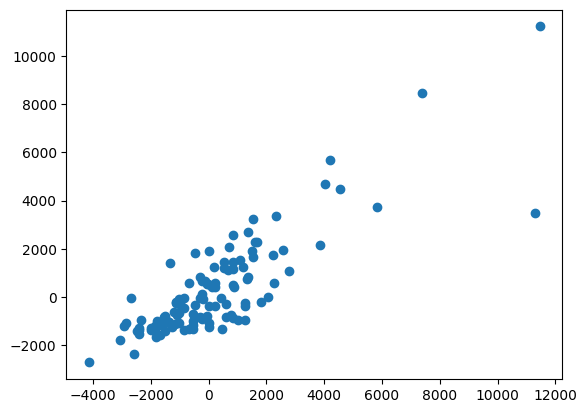

In [20]:
ETA_new = []
for i in range(len(ETA)):
    ETA_new.append(ETA[i][0])
ATA = arrivals_cleaned['arrival_delay']
plt.scatter(ATA,ETA_new)
plt.xlabel='Actual Delay'
plt.ylabel='Estimated Delay'
